In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 

We have a `matplotlib-inline` package, so we don't have to do anything. Otherwise if the plots are not showing, run the following magic command: 

```%matplotlib inline```

We want to reproduce the [following chart from the DatavizProject](https://datavizproject.com/data-type/lollipop-chart/): 

<img src="https://datavizproject.com/wp-content/uploads/types/Lollipop-Chart.png" width=500 />


Read in the dummy data: 

In [2]:
df = pd.read_csv('lollipop_data.csv')

In [3]:
df

,var1,var2
0,A,180
1,B,520
2,C,810
3,D,270
4,E,780
5,F,830


Let's go step by step. 

Remark: In each cell we will create a **new** figure object, and in all cells I reuse the same names, so we keep overwriting the variables. But you can create many figure objects in parallel if you need. 

Create the points: 

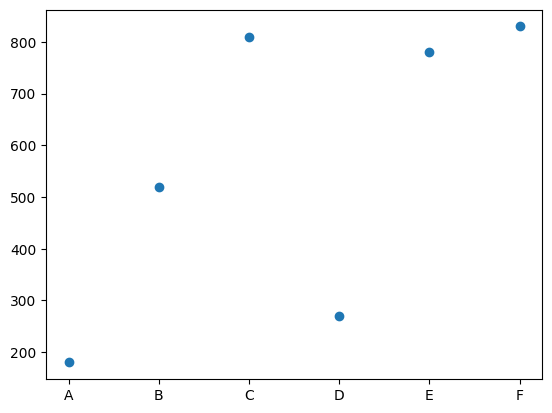

In [4]:
f, ax = plt.subplots()

# draw the ends 
ax.scatter(x=df['var1'], y=df['var2'])

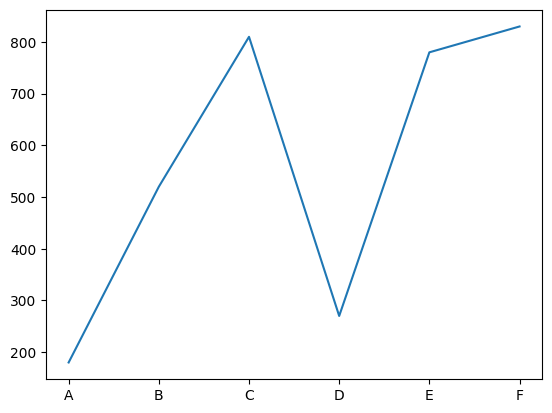

In [5]:
f, ax = plt.subplots()

# draw the ends 
ax.plot(df['var1'], df['var2'])

What is f, ax?

In [6]:
type(f)

matplotlib.figure.Figure

In [7]:
type(ax)

matplotlib.axes._axes.Axes

In [8]:
f.get_children()

[<matplotlib.patches.Rectangle at 0x186c6bd00d0>, <Axes: >]

In [10]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

Prototype the lines using `ax.plot()`:

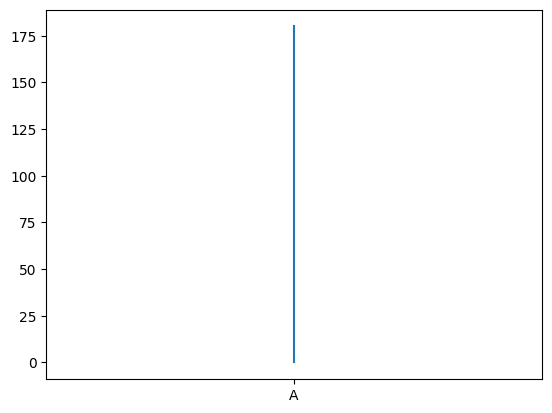

In [11]:
f, ax = plt.subplots()

# draw the lines - naive solution
ax.plot(
        [df['var1'][0], df['var1'][0]], # my x-values: 'A', 'A'
        [0,df['var2'][0]]  # my y-values: 0, 180
) 

We can add more: 

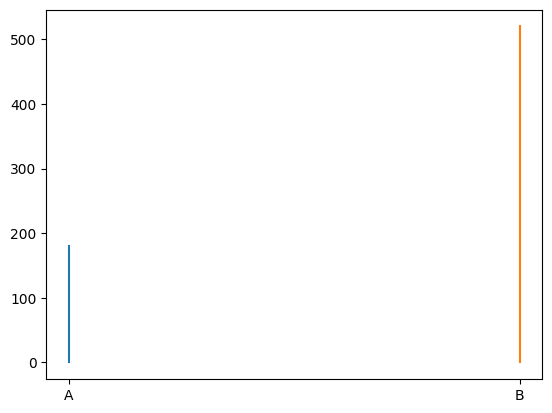

In [12]:
f, ax = plt.subplots()

# draw the lines - naive solution
ax.plot([df['var1'][0], df['var1'][0]], 
        [0,df['var2'][0]])

ax.plot([df['var1'][1], df['var1'][1]], 
        [0,df['var2'][1]])


With each overplotted plot, mpl changes the colors (-> "cycler") 

Let's use a loop for this: 

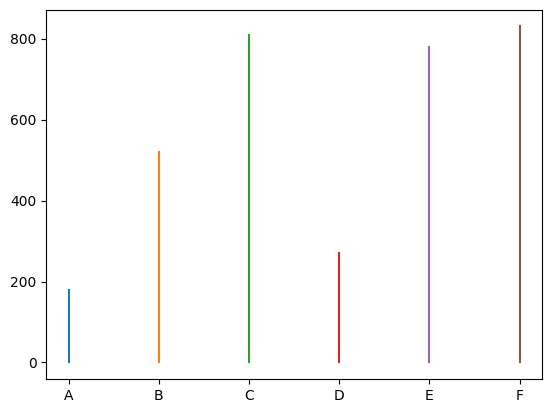

In [16]:
f, ax = plt.subplots()

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]])


We could also use more advanced pandas functions to iterate through the contents, but let's keep it simple for now. 

Style the plot: 

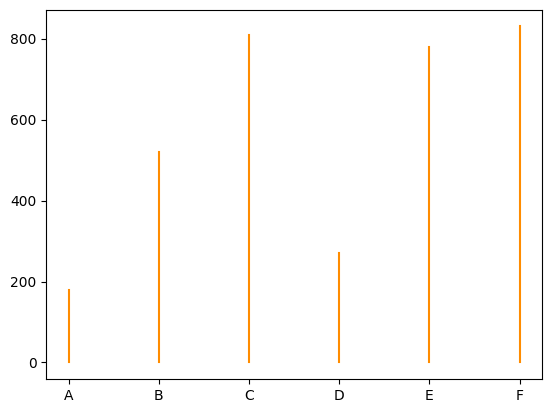

In [17]:
f, ax = plt.subplots()

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
            c='darkorange')


Save the styling in a separate variable: 

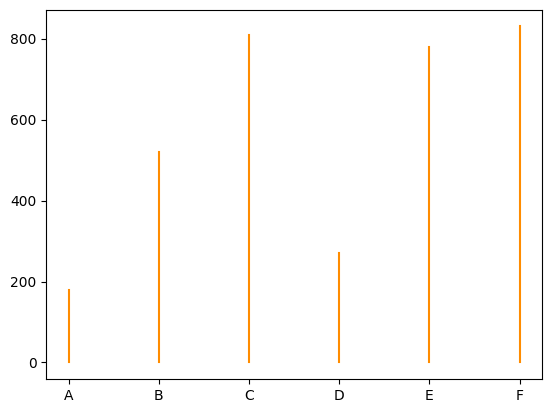

In [18]:
f, ax = plt.subplots()

# style the plot
style = {'c': 'darkorange'}

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
           **style)


Read more about the unpacking operator: 

- https://realpython.com/python-kwargs-and-args/ 
- https://www.shecancode.io/blog/unpacking-function-arguments-in-python 

Let's put it all together: 

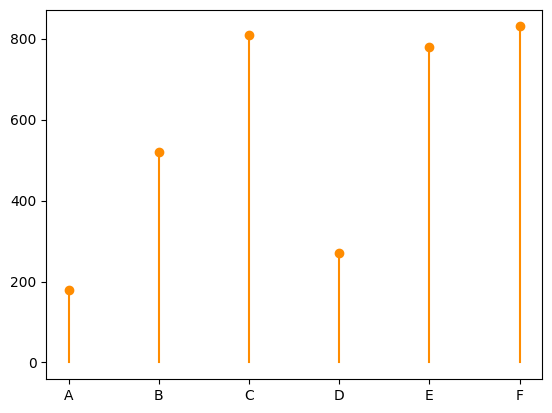

In [19]:
f, ax = plt.subplots()

# style the plot
style = {'c': 'darkorange'}

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
           **style)

# draw the ends 
ax.scatter(x=df['var1'], y=df['var2'], 
           **style)

Change the limits: 

(0.0, 900.0)

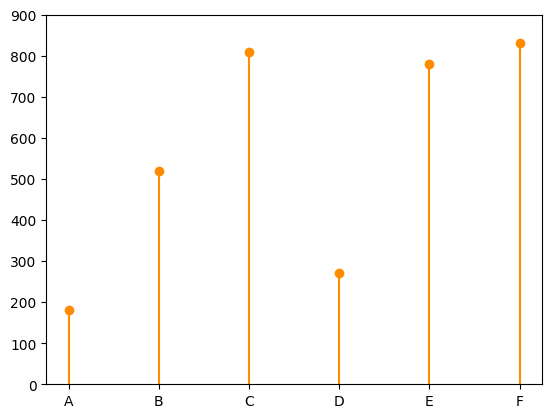

In [20]:
f, ax = plt.subplots()

# style the plot
style = {'c': 'darkorange'}

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
           **style)

# draw the ends 
ax.scatter(x=df['var1'], y=df['var2'], 
           **style)


ax.set_ylim([0, 900])

Usually, for `set_...` methods there is an associated `get_...` method: 

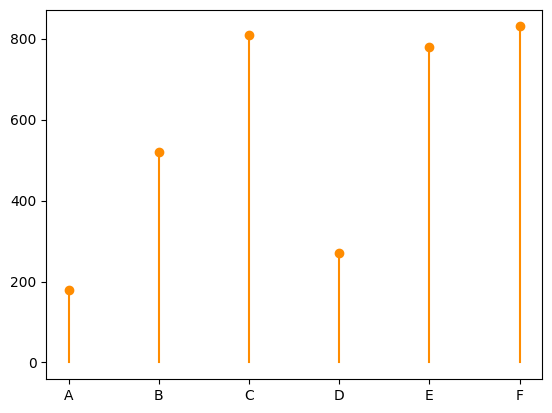

In [21]:
f, ax = plt.subplots()

# style the plot
style = {'c': 'darkorange'}

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
           **style)

# draw the ends 
ax.scatter(x=df['var1'], y=df['var2'], 
           **style)


my_ylims = ax.get_ylim()

In [24]:
print(my_ylims)

(-41.5, 871.5)


Set the title and axis labels: 

Text(0, 0.5, 'Value')

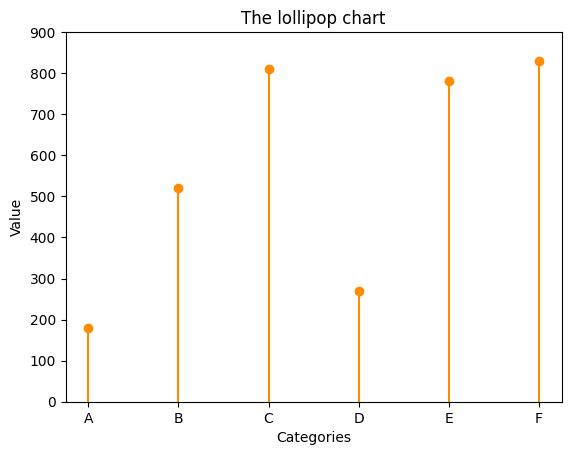

In [25]:
f, ax = plt.subplots()

# style the plot
style = {'c': 'darkorange'}

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
           **style)

# draw the ends 
ax.scatter(x=df['var1'], y=df['var2'], 
           **style)


ax.set_ylim([0, 900])

ax.set_title('The lollipop chart')
ax.set_xlabel('Categories')
ax.set_ylabel('Value')

The offset -> too small dpi (mpl centers things around pixels while drawing)

Change the aspect ratio, adjust dpi:

Text(0, 0.5, 'Value')

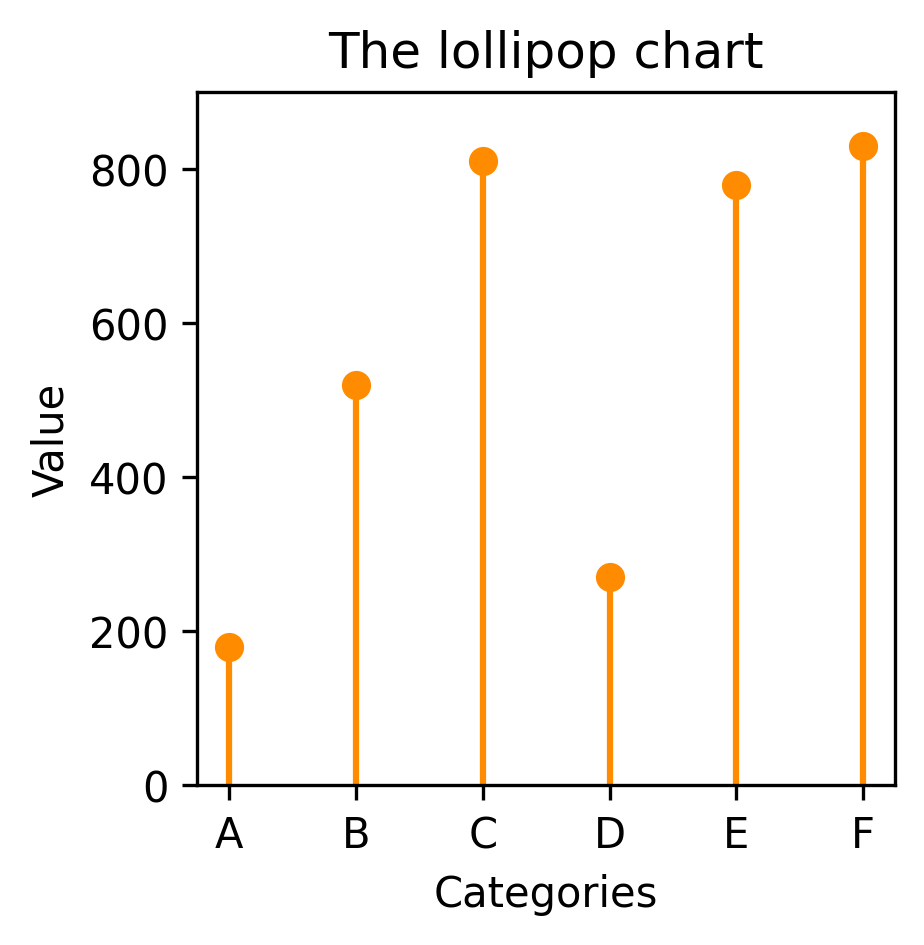

In [27]:
f, ax = plt.subplots(figsize=(3,3), dpi=300)

# style the plot
style = {'c': 'darkorange'}

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
           **style)

# draw the ends 
ax.scatter(x=df['var1'], y=df['var2'], 
           **style)


ax.set_ylim([0, 900])

ax.set_title('The lollipop chart')
ax.set_xlabel('Categories')
ax.set_ylabel('Value')

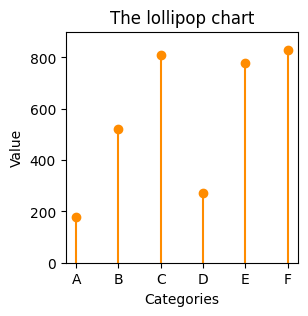

In [28]:
f, ax = plt.subplots(figsize=(3,3), dpi=100)

# style the plot
style = {'c': 'darkorange'}

# draw the lines - naive solution
for i in range(df.shape[0]):
    ax.plot([df['var1'][i], df['var1'][i]], 
            [0,df['var2'][i]], 
           **style)

# draw the ends 
ax.scatter(x=df['var1'], y=df['var2'], 
           **style)


ax.set_ylim([0, 900])

ax.set_title('The lollipop chart')
ax.set_xlabel('Categories')
ax.set_ylabel('Value')

f.savefig('reproduced_lollipop.png', dpi=300, bbox_inches='tight', facecolor='white')

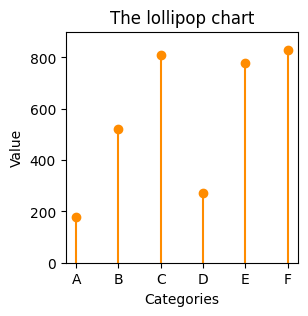

In [29]:
f

I can also save the same figure object in a different format: 

In [30]:
f.savefig('lollipop.svg', bbox_inches='tight')

In [31]:
f.savefig('lollipop.pdf', bbox_inches='tight')